In [2]:
import cv2
import matplotlib.pyplot as plt


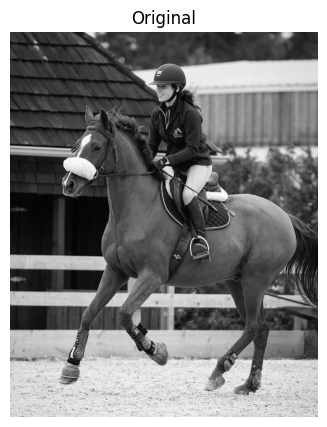

In [3]:
image = cv2.imread("./images/horse.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(5, 5))
plt.imshow(image, cmap="gray")
plt.title("Original")
plt.axis("off")
plt.show()


Ta dùng một cấu hình baseline thường gặp: blur nhẹ + Canny thresholds trung bình.


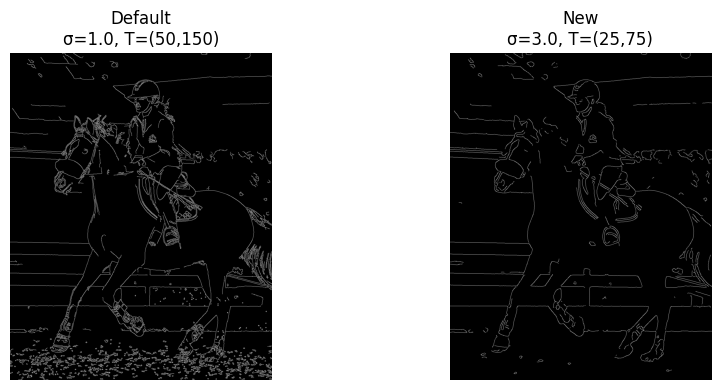

In [4]:
# So sánh với giá trị mặc định (baseline)

# Mặc định (baseline)
sigma_default = 1.0
low_default = 50
high_default = 150

# Thử nghiệm (bạn đổi 3 giá trị này)
sigma = 3.0
low_threshold = 25
high_threshold = 75

# Default result
blurred_def = cv2.GaussianBlur(image, ksize=(0, 0), sigmaX=sigma_default, sigmaY=sigma_default)
edges_def = cv2.Canny(blurred_def, low_default, high_default)

# New result
blurred_new = cv2.GaussianBlur(image, ksize=(0, 0), sigmaX=sigma, sigmaY=sigma)
edges_new = cv2.Canny(blurred_new, low_threshold, high_threshold)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(edges_def, cmap="gray")
plt.title(f"Default\nσ={sigma_default}, T=({low_default},{high_default})")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(edges_new, cmap="gray")
plt.title(f"New\nσ={sigma}, T=({low_threshold},{high_threshold})")
plt.axis("off")

plt.tight_layout()
plt.show()


Giữ nguyên threshold như baseline, chỉ thay σ = 1, 2, 3 để thấy xu hướng “σ tăng → biên giảm”.

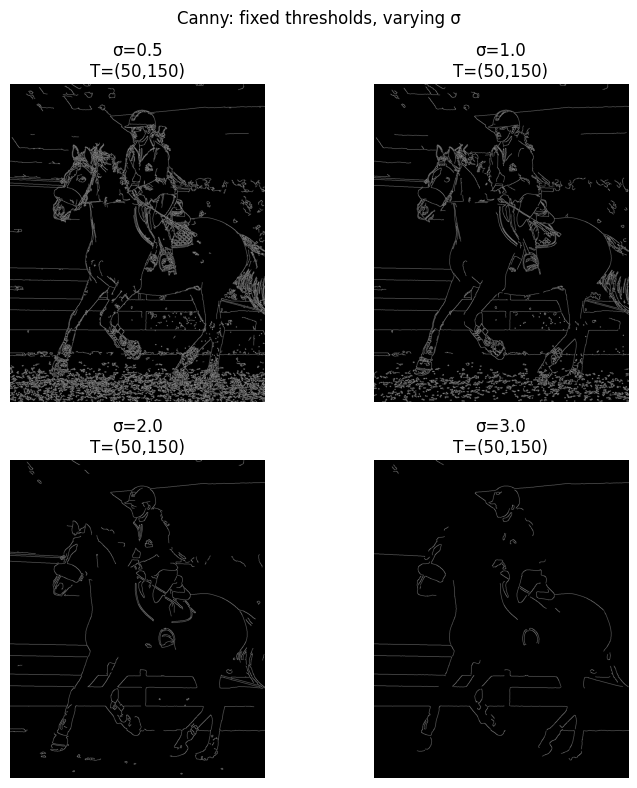

In [5]:
# Giữ ngưỡng cố định, thay đổi sigma
sigmas = [0.5, 1.0, 2.0, 3.0]

low_threshold = 50
high_threshold = 150

n_cols = 2
n_rows = 2
plt.figure(figsize=(4 * n_cols, 4 * n_rows))
for i, sigma in enumerate(sigmas):
    blurred = cv2.GaussianBlur(image, ksize=(0, 0), sigmaX=sigma, sigmaY=sigma)
    edges = cv2.Canny(blurred, low_threshold, high_threshold)

    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(edges, cmap="gray")
    plt.title(f"σ={sigma}\nT=({low_threshold},{high_threshold})")
    plt.axis("off")

plt.suptitle("Canny: fixed thresholds, varying σ")
plt.tight_layout()
plt.show()

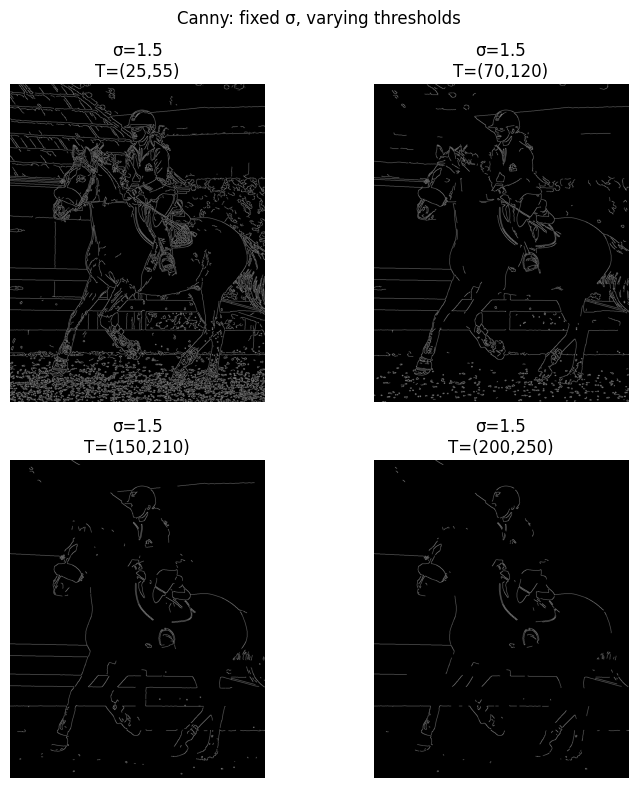

In [6]:
# Giữ sigma cố định, thay đổi ngưỡng (low/high)
sigma = 1.5

thresholds = [
    (25, 55),
    (70, 120),
    (150, 210),
    (200, 250),
]

n_cols = 2
n_rows = (len(thresholds) + n_cols - 1) // n_cols
plt.figure(figsize=(4 * n_cols, 4 * n_rows))
blurred = cv2.GaussianBlur(image, ksize=(0, 0), sigmaX=sigma, sigmaY=sigma)

for i, (low_threshold, high_threshold) in enumerate(thresholds):
    edges = cv2.Canny(blurred, low_threshold, high_threshold)

    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(edges, cmap="gray")
    plt.title(f"σ={sigma}\nT=({low_threshold},{high_threshold})")
    plt.axis("off")

plt.suptitle("Canny: fixed σ, varying thresholds")
plt.tight_layout()
plt.show()

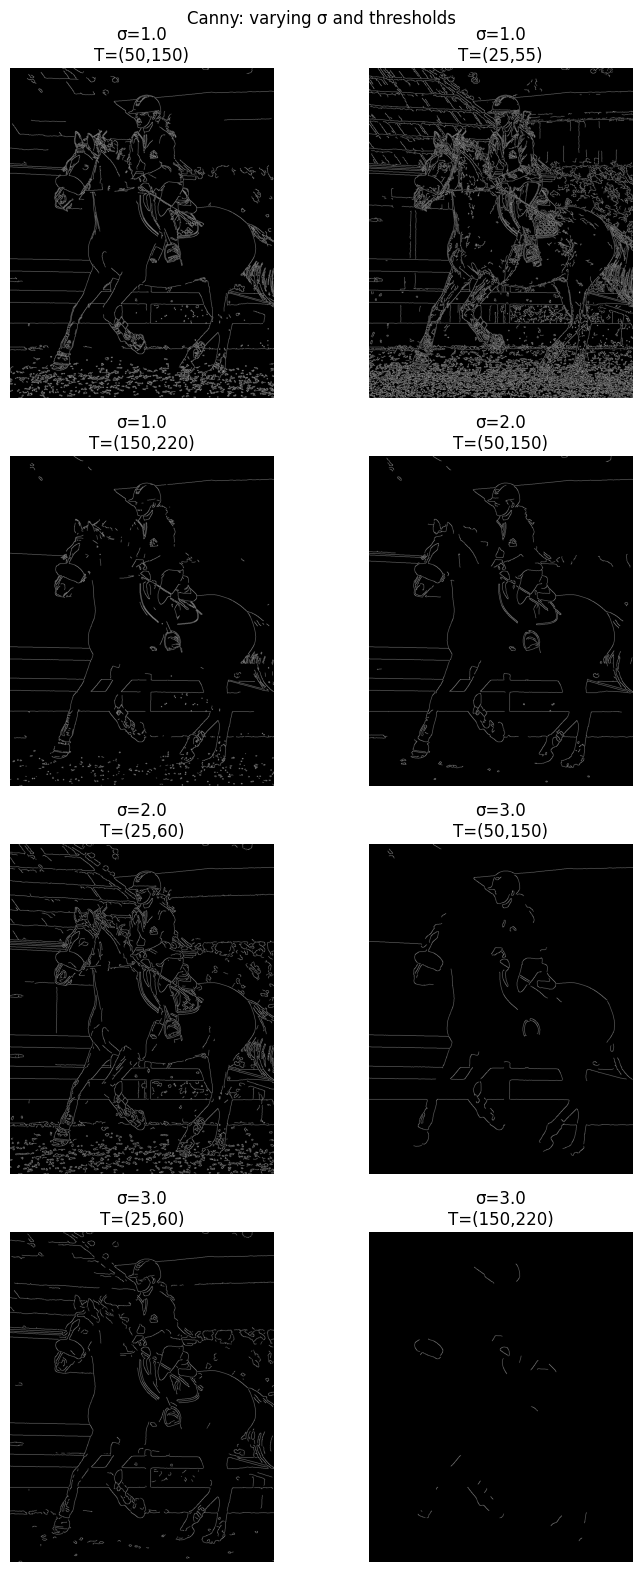

In [7]:
# Thay đổi cả sigma và ngưỡng, theo dõi ảnh hưởng lên ảnh
configs = [
    # (sigma, low, high)
    (1.0, 50, 150),
    (1.0, 25, 55),
    (1.0, 150, 220),
    (2.0, 50, 150),
    (2.0, 25, 60),
    (3.0, 50, 150),
    (3.0, 25, 60),
    (3.0, 150, 220),
]

n_cols = 2
n_rows = (len(configs) + n_cols - 1) // n_cols
plt.figure(figsize=(4 * n_cols, 4 * n_rows))
for i, (sigma, low_threshold, high_threshold) in enumerate(configs):
    blurred = cv2.GaussianBlur(image, ksize=(0, 0), sigmaX=sigma, sigmaY=sigma)
    edges = cv2.Canny(blurred, low_threshold, high_threshold)

    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(edges, cmap="gray")
    plt.title(f"σ={sigma}\nT=({low_threshold},{high_threshold})")
    plt.axis("off")

plt.suptitle("Canny: varying σ and thresholds")
plt.tight_layout()
plt.show()